In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
baseball=pd.read_csv('baseball.csv')
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df=pd.DataFrame(data=baseball)
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


([array([11.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([10.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([13.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([12.,  2.,  2., 

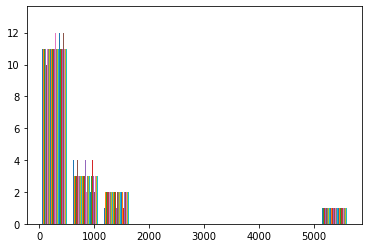

In [4]:
plt.hist(df)

In [5]:
df.shape

(30, 17)

(array([1., 3., 8., 8., 5., 3., 1., 0., 0., 1.]),
 array([573. , 604.8, 636.6, 668.4, 700.2, 732. , 763.8, 795.6, 827.4,
        859.2, 891. ]),
 <a list of 10 Patch objects>)

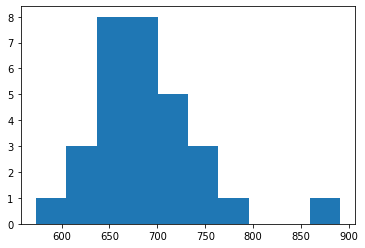

In [6]:
plt.hist(df['R'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d640469c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d640456248>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d640469108>],
 'medians': [<matplotlib.lines.Line2D at 0x1d64046da08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6404722c8>],
 'means': []}

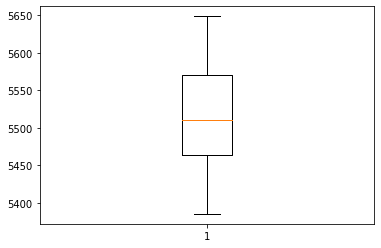

In [7]:
plt.boxplot(df['AB'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23afb0876c8>,
 'caps': [<matplotlib.lines.Line2D at 0x23afb087fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23afb080c88>],
 'medians': [<matplotlib.lines.Line2D at 0x23afb08bf48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23afb08fd88>],
 'means': []}

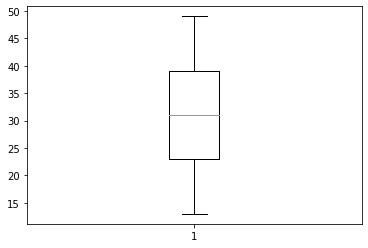

In [82]:
plt.boxplot(df['3B'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23afb0eb688>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23afa67bac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x23afb0eb988>,
 'cbars': <matplotlib.collections.LineCollection at 0x23afb0f4e48>}

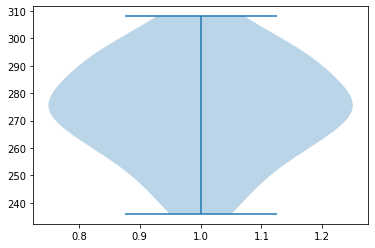

In [83]:
plt.violinplot(df['2B'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23afb164448>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23afb127948>,
 'cmins': <matplotlib.collections.LineCollection at 0x23afb1646c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x23afb16ab08>}

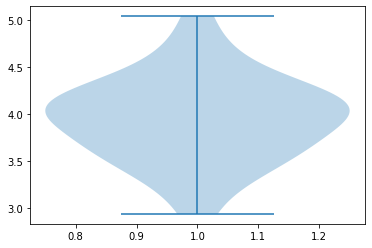

In [84]:
plt.violinplot(df['ERA'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ce33fa5d48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ce33fa1088>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ce33fadfc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ce33fadf48>}

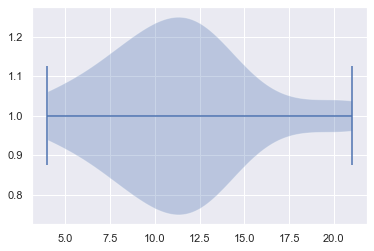

In [211]:
plt.violinplot(df['SHO'],vert=False)

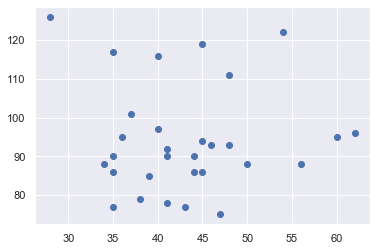

In [212]:
plt.scatter(x='SV',y='E',data=df)

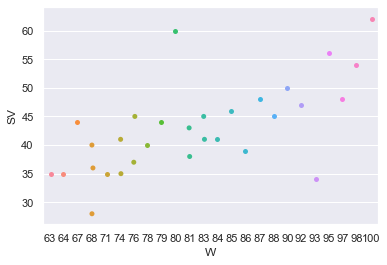

In [213]:
sns.stripplot(x='W',y='SV',data=df)

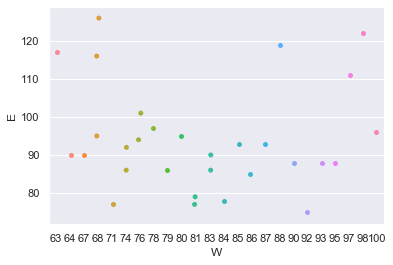

In [214]:
sns.stripplot(x='W',y='E',data=df)

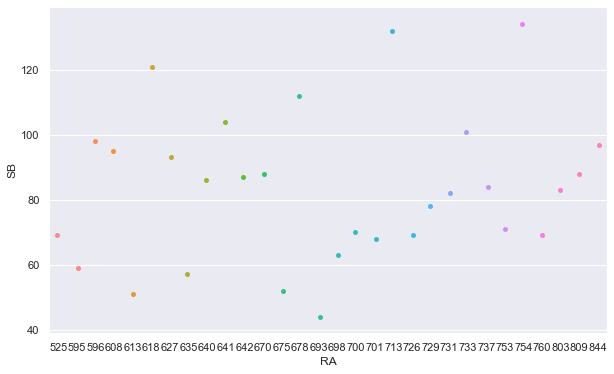

In [215]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.stripplot('RA','SB',data=df)

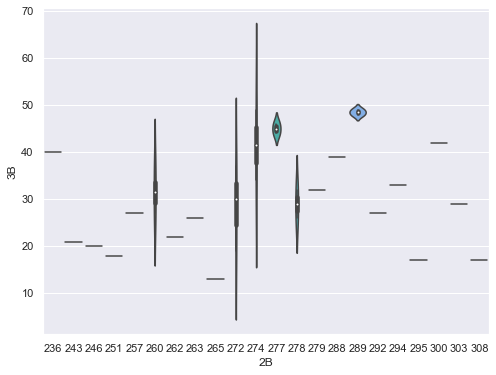

In [216]:
plt.figure(figsize=(8,6))
sns.violinplot('2B','3B',data=df)

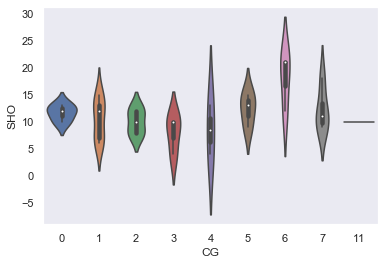

In [217]:
sns.set_style('dark')
sns.violinplot('CG','SHO',data=df)

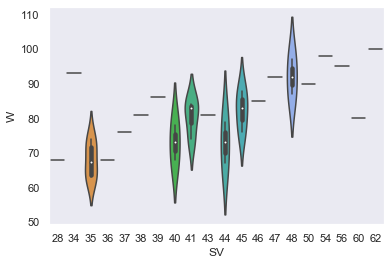

In [218]:
sns.violinplot('SV','W',data=df)

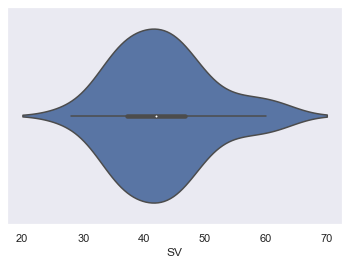

In [219]:
sns.violinplot(df['SV'])

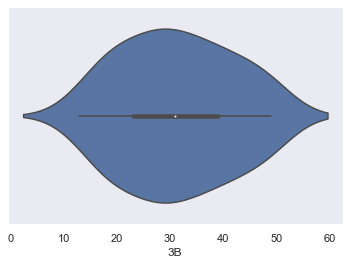

In [220]:
sns.violinplot(df['3B'])

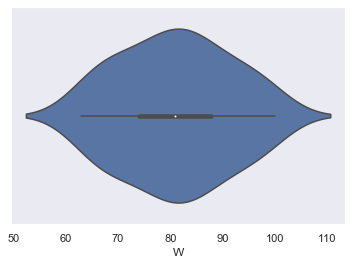

In [221]:
sns.violinplot(df['W'])

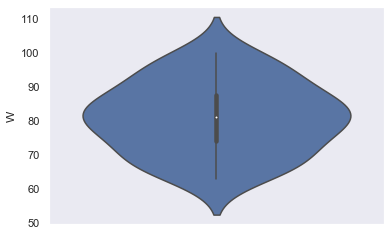

In [222]:
sns.violinplot(y='W',data=df)

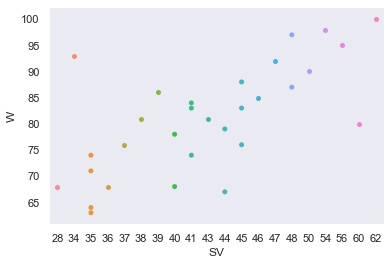

In [223]:
sns.swarmplot('SV','W',data=df)

In [224]:
cg=df[df['CG']==7]
cg

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78


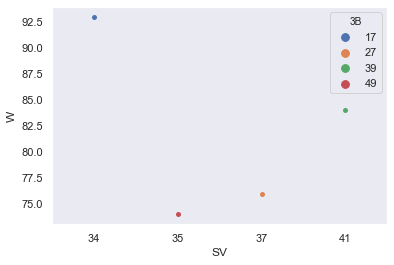

In [225]:
sns.swarmplot('SV','W',hue='3B',data=cg)

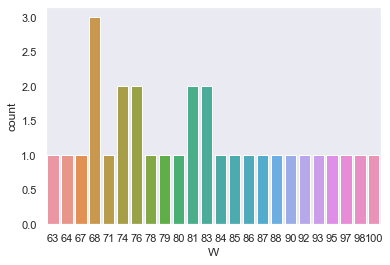

In [226]:
sns.countplot(df['W'])

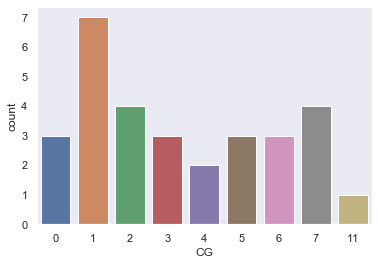

In [227]:
sns.countplot(df['CG'])

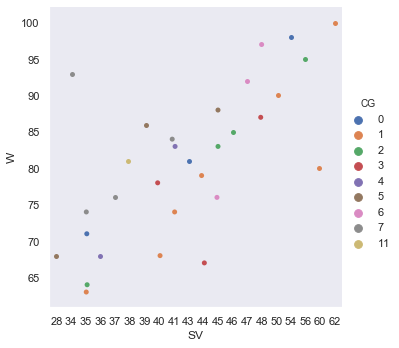

In [228]:
sns.catplot('SV','W',hue='CG',data=df)

<Figure size 432x576 with 0 Axes>

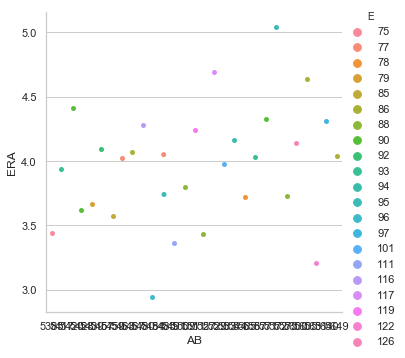

In [229]:
plt.figure(figsize=(6,8))
sns.set_style('whitegrid')
sns.catplot('AB','ERA',hue='E',data=df)

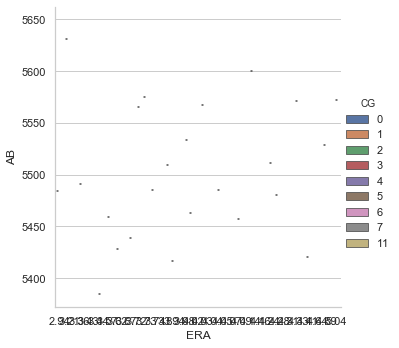

In [230]:
sns.catplot('ERA','AB',hue='CG',data=df,kind='violin')

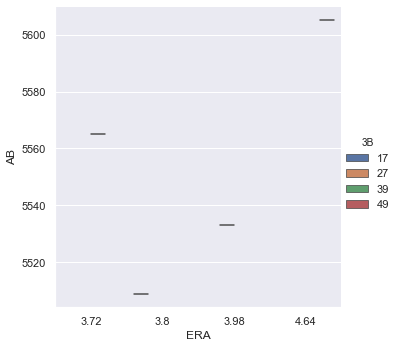

In [231]:
sns.set(style='darkgrid')
sns.catplot('ERA','AB',hue='3B',data=cg,kind='violin')

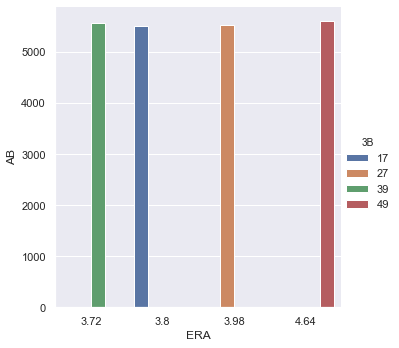

In [232]:
sns.set(style='darkgrid')
sns.catplot('ERA','AB',hue='3B',data=cg,kind='bar')

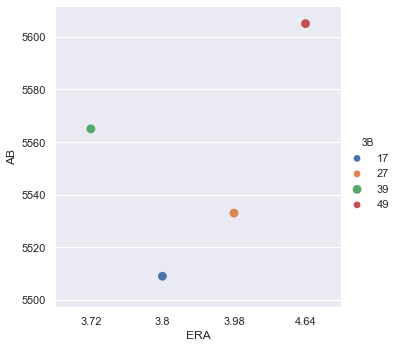

In [233]:
sns.set(style='darkgrid')
sns.catplot('ERA','AB',hue='3B',data=cg,kind='point')

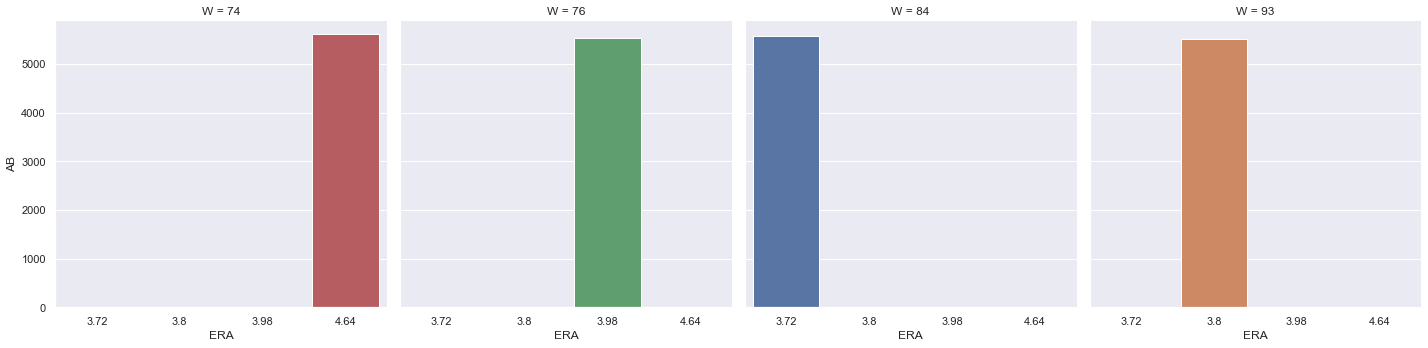

In [234]:
sns.catplot('ERA','AB',col='W',data=cg,kind='bar')

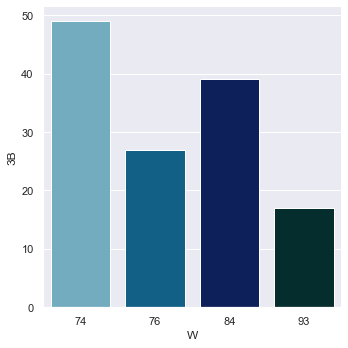

In [235]:
sns.catplot('W','3B',data=cg,kind='bar',palette='ocean_r')

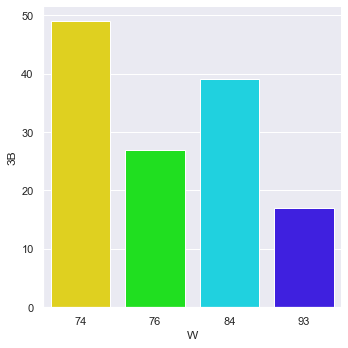

In [236]:
sns.catplot('W','3B',data=cg,kind='bar',palette='gist_rainbow')

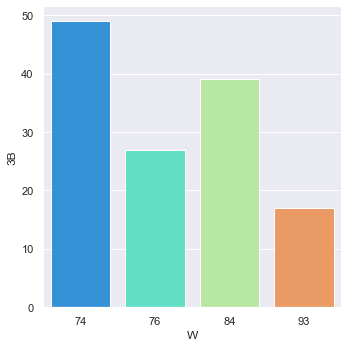

In [237]:
sns.catplot('W','3B',data=cg,kind='bar',palette='rainbow')

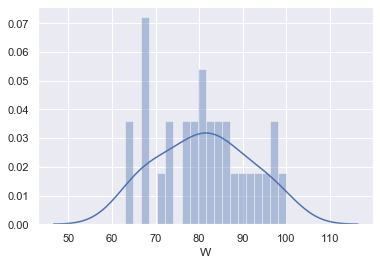

In [238]:
sns.distplot(df['W'],bins=20)

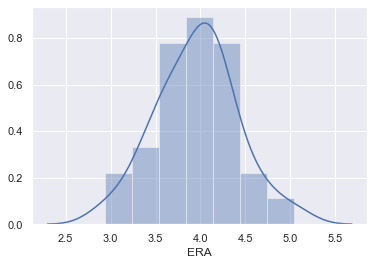

In [239]:
sns.distplot(df['ERA'])

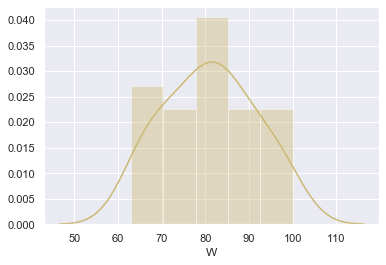

In [240]:
sns.distplot(df['W'],color='y')

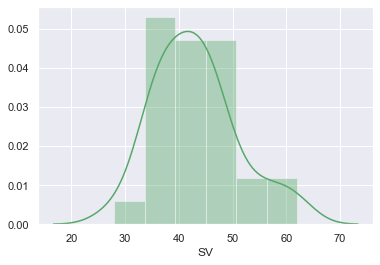

In [241]:
sns.distplot(df['SV'],color='g')

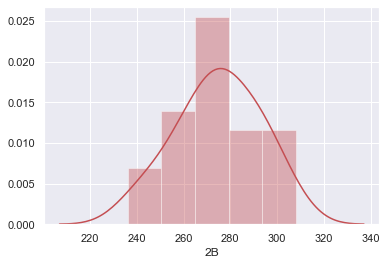

In [242]:
sns.distplot(df['2B'],color='r')

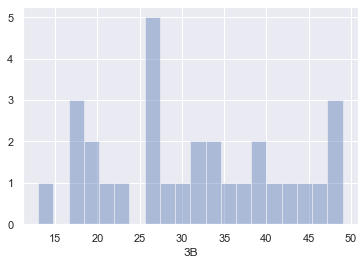

In [243]:
sns.distplot(df['3B'],bins=20,kde=False)

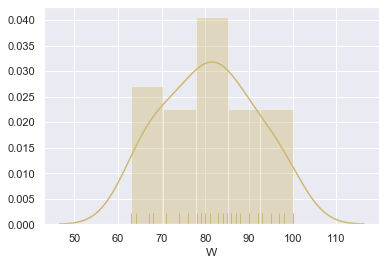

In [244]:
sns.distplot(df['W'],rug=True,color='y')

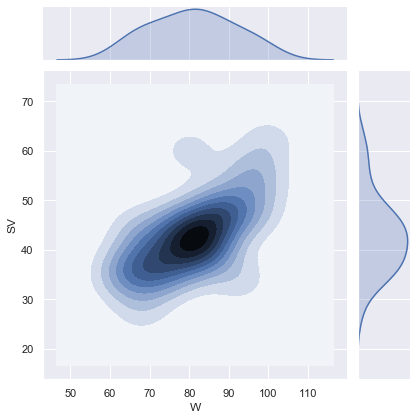

In [245]:
sns.jointplot('W','SV',data=df,kind='kde')

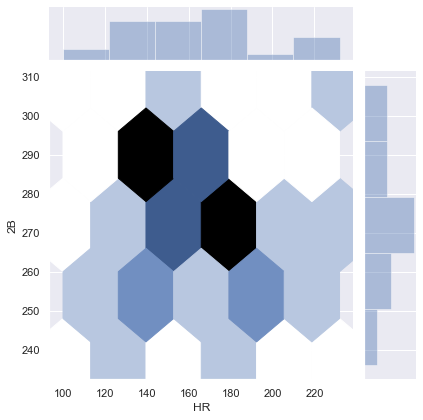

In [246]:
sns.jointplot('HR','2B',data=df,kind='hex')

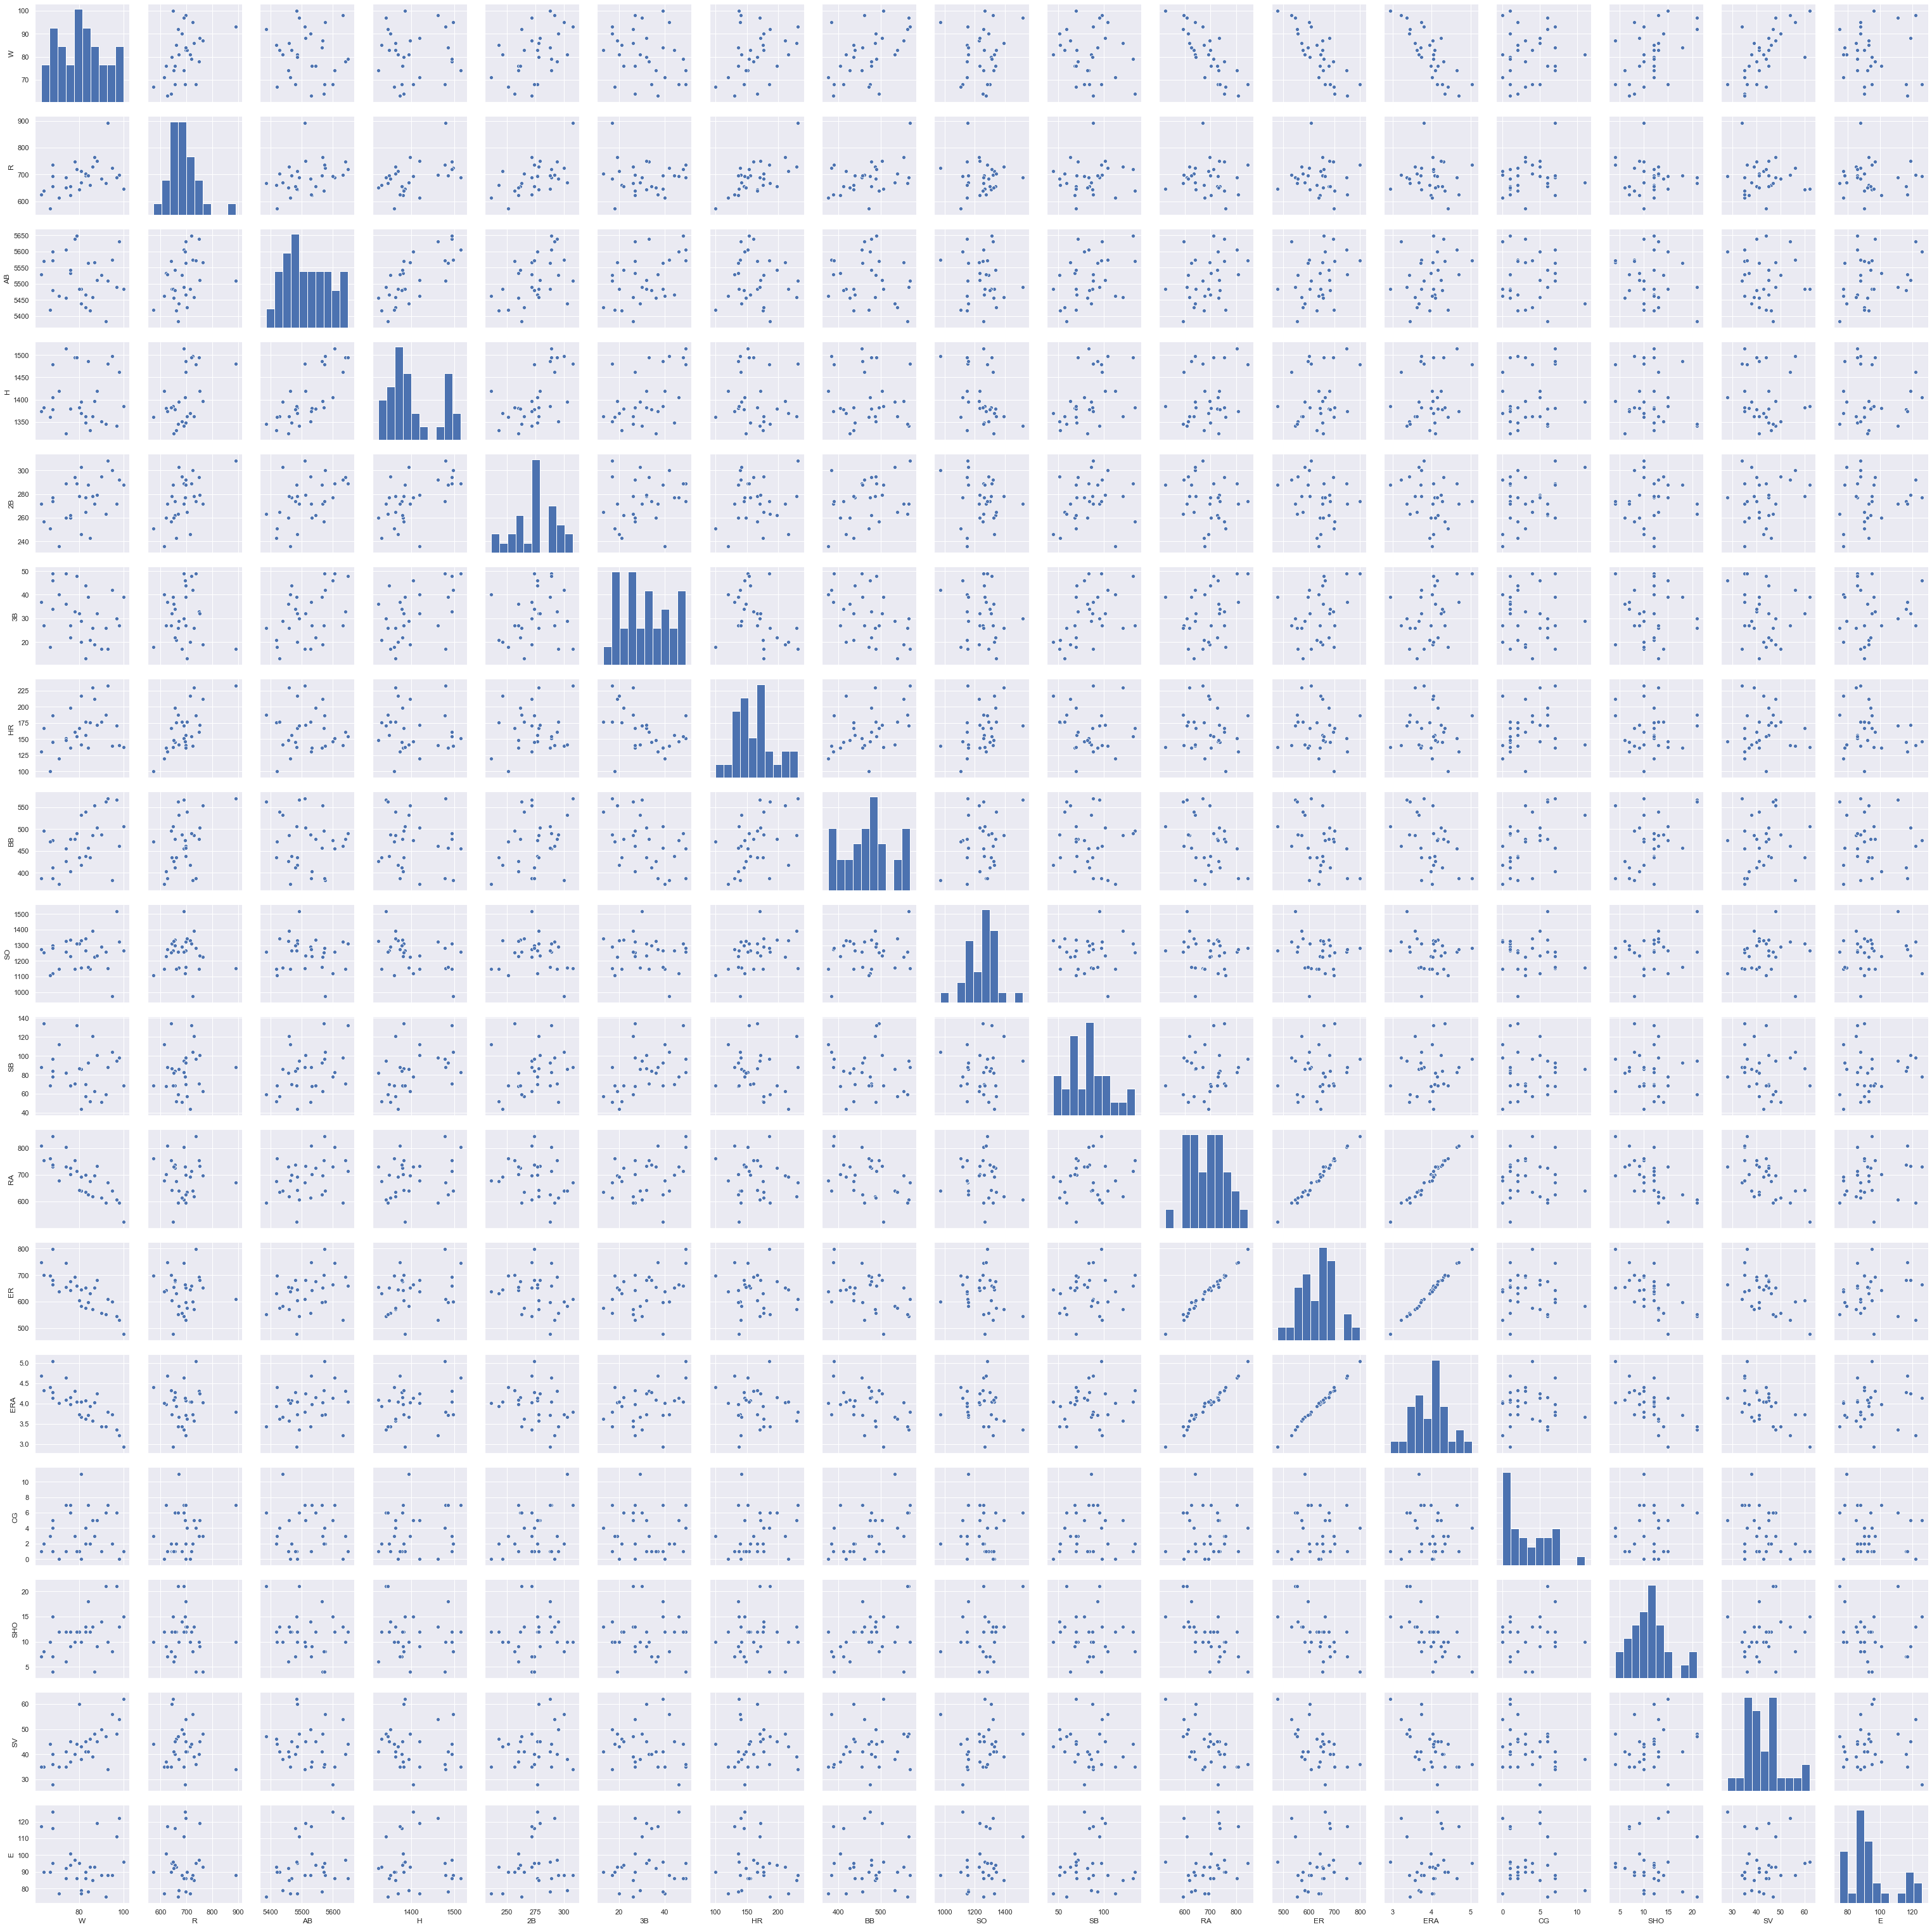

In [102]:
sns.pairplot(df)

In [8]:
df.shape

(30, 17)

In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

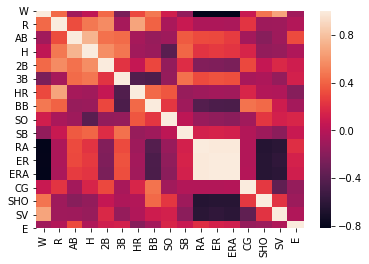

In [10]:
sns.heatmap(df.corr())

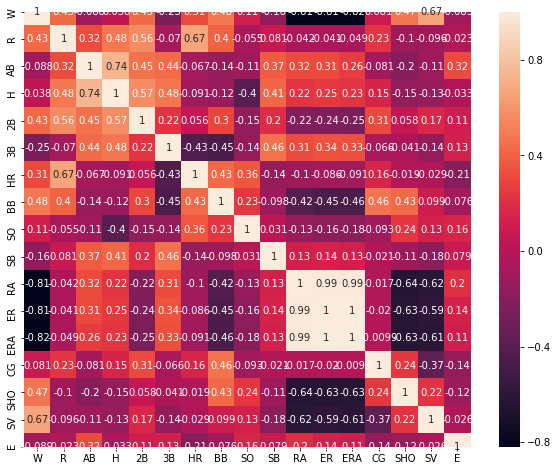

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [12]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scale=StandardScaler()

In [18]:
x=df.drop('W',axis=1).head()
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [19]:
print(x[:0:16])

Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []


In [20]:
y=df['W'].head()
y

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [21]:
print(y)

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [23]:
ln=LinearRegression()

In [24]:
ln.fit(x_train,y_train)
ln.coef_

array([ 2.21597055e-02, -7.29554662e-03,  3.10513651e-02,  4.41420128e-03,
        3.40620968e-03,  1.07461650e-03, -1.36711831e-02, -4.60107135e-02,
        6.77059609e-03, -6.16698486e-03, -8.07604775e-03, -4.63515509e-05,
       -1.43074571e-03, -2.94197862e-04,  4.31838168e-03, -9.96718977e-04])

In [25]:
ln.intercept_

129.48681639731106

In [26]:
ln.score(x_train,y_train)

1.0

In [27]:
pred=ln.predict(x_test)
print('Predict the no. of wining mach:',pred)
print('Actual no. of mach wining:',y_test)

Predict the no. of wining mach: [75.27998746 77.99993562]
Actual no. of mach wining: 1    83
4    74
Name: W, dtype: int64


In [28]:
print('Error:')
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

Error:
5.8599740776817555
37.79903925560513
6.148092326535536


In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-0.8666192224990188


In [30]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(r2_score(y_test,predgnb))

-0.308641975308642


In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}

model=Lasso()
grid=GridSearchCV(model,alphavalue)

grid.fit(x,y)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
nan
1
{'alpha': 1}


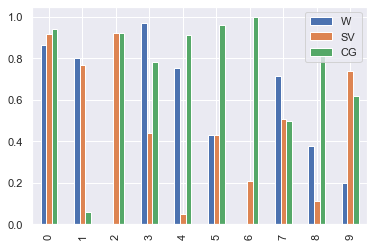

In [185]:
df=pd.DataFrame(np.random.rand(10,3),columns=['W','SV','CG'])
df.plot.bar()

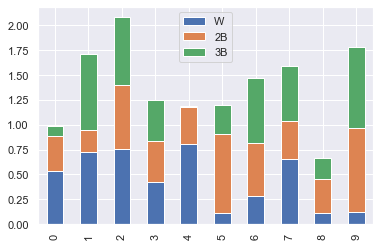

In [186]:
df=pd.DataFrame(np.random.rand(10,3),columns=['W','2B','3B'])
df.plot.bar(stacked=True)

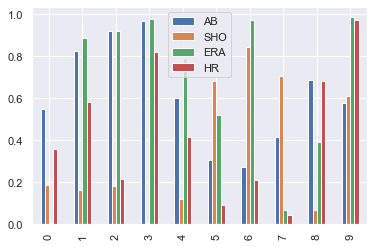

In [187]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AB','SHO','ERA','HR'])
df.plot.bar()

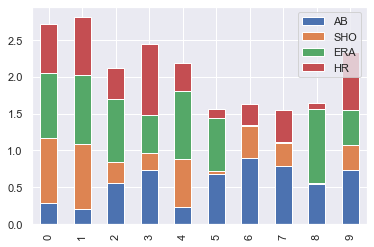

In [188]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AB','SHO','ERA','HR'])
df.plot.bar(stacked=True)

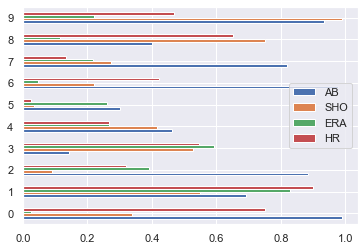

In [189]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AB','SHO','ERA','HR'])
df.plot.barh()

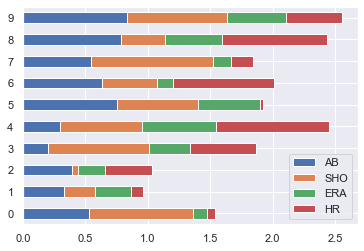

In [190]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AB','SHO','ERA','HR'])
df.plot.barh(stacked=True)

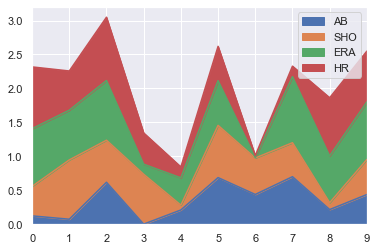

In [191]:
df=pd.DataFrame(np.random.rand(10,4),columns=['AB','SHO','ERA','HR'])
df.plot.area()

Description of this project in writen.
#First, I imported all the libraries that were needed for this dataset
#Then all data  by EDA, In which two important function matplotlib, seaborn are use for visualization.These twe function have
many model.like:- boxplot,strimpplot,swarmplot,violinplot,distplot,catplot etc.
#After that i also checked data cleaning and null values.
#Standardisation the level data or input data or (x).
#Then seperate the input features and target variable.
#For this dataset linear regression approach is neccessary,So i have select only LinearRegression model. 
#From this model i have predict the number of wining match.

#And lastly i have performed data visualization by help of pandas.

In [280]:
from sklearn.externals import joblib

In [281]:
joblib.dump(ln,'winingmachfile.obj')

['winingmachfile.obj']